# RocketPy Simulation
This notebook was generated using Rocket-Serializer, a RocketPy tool to convert simulation files to RocketPy simulations
The notebook was generated using the following parameters file: `./v-10-jose\parameters.json`


In [6]:
%pip install rocketpy<=2.0


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [7]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, TrapezoidalFins, EllipticalFins, RailButtons, NoseCone, Tail, Parachute
import datetime


## Environment


In [8]:
env = Environment()
env.set_location(latitude=28.61, longitude=-80.6)
env.set_elevation(1402.0800000000002)


Optionally, you can set the date and atmospheric model


In [9]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
# env.set_atmospheric_model(type='Forecast', file='GFS')


Gravity Details

Acceleration of gravity at surface level:    9.7760 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5379 m/s²


Launch Site Details

Launch Date: 2025-10-28 12:00:00 UTC
Launch Site Latitude: 28.61000°
Launch Site Longitude: -80.60000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 1402.1 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 855.75 hPa
Surface Temperature: 279.05 K
Surface Air Density: 1.068 kg/m³
Surface Speed of Sound: 334.54 m/s


Earth Model Details

Earth Radius at Launch site: 6378.14 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034



Gravity Model Plots


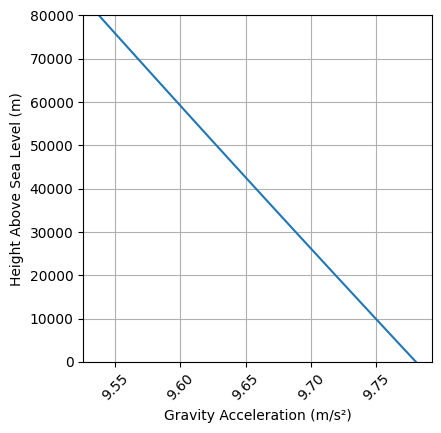



Atmospheric Model Plots


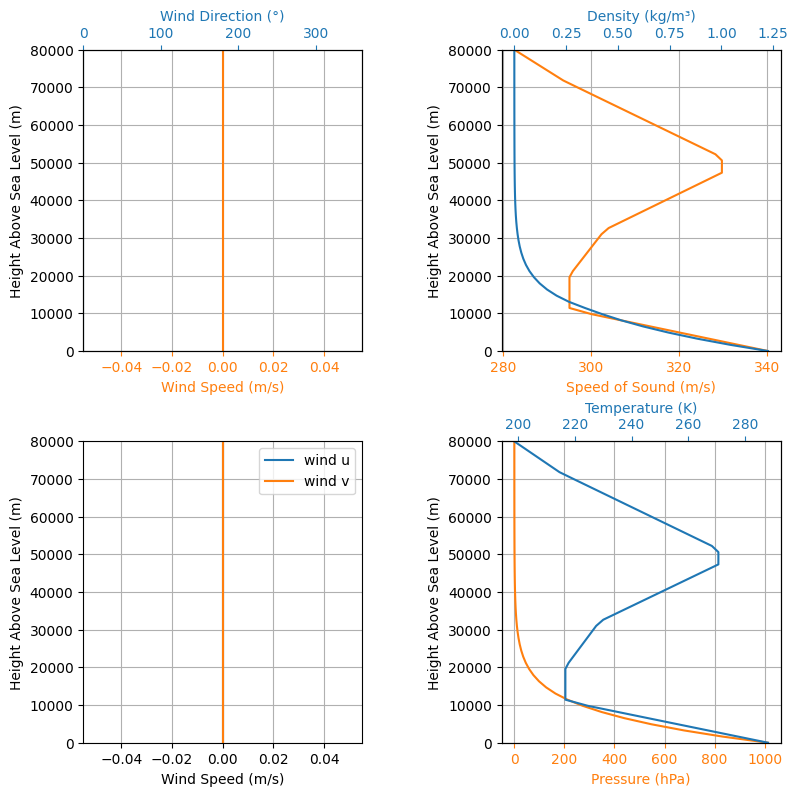

In [10]:
env.all_info()


In [11]:
# Clean thrust source CSV to remove duplicate timestamps (average repeated times)
import pandas as pd
from pathlib import Path

src = Path('thrust_source.csv')
dst = Path('thrust_source_clean.csv')

# Read as two columns (time, thrust)
df = pd.read_csv(src, header=None, names=['t', 'thrust'])
print(f'Rows before: {len(df)}, unique times: {df["t"].nunique()}')

# Group by time and average duplicated thrust values, then sort by time
df_clean = df.groupby('t', as_index=False)['thrust'].mean().sort_values('t')

# Write without header to match expected RocketPy format (two columns)
df_clean.to_csv(dst, index=False, header=False, float_format='%.5f')
print(f'Rows after: {len(df_clean)} written to {dst}')

# Show the first few lines
print(df_clean.head())

Rows before: 607, unique times: 411
Rows after: 411 written to thrust_source_clean.csv
      t     thrust
0  0.01   194.0378
1  0.02   517.4348
2  0.03   840.8318
3  0.04  1164.2288
4  0.05  1487.6258


## Motor
Currently, only Solid Motors are supported by Rocket-Serializer. If you want to use a Liquid/Hybrid motor, please use rocketpy directly.


In [12]:
motor = SolidMotor(
    thrust_source='thrust_source_clean.csv',
    dry_mass=0,
    center_of_dry_mass_position=0,
    dry_inertia=[0, 0, 0],
    grains_center_of_mass_position=0,
    grain_number=1,
    grain_density=1173.1466429429975,
    grain_outer_radius=0.049,
    grain_initial_inner_radius=0.0245,
    grain_initial_height=0.702,
    grain_separation=0,
    nozzle_radius=0.036750000000000005,
    nozzle_position=-0.351,
    throat_radius=0.0245,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method='linear',
    coordinate_system_orientation='nozzle_to_combustion_chamber',
)

Nozzle Details
Nozzle Radius: 0.036750000000000005 m
Nozzle Throat Radius: 0.0245 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1173.1466429429975 kg/m3
Grain Outer Radius: 0.049 m
Grain Inner Radius: 0.0245 m
Grain Height: 0.702 m
Grain Volume: 0.004 m3
Grain Mass: 4.659 kg

Motor Details
Total Burning Time: 4.2540000000000004 s
Total Propellant Mass: 4.659 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2063.067 m/s
Average Thrust: 2259.480 N
Maximum Thrust: 2861.69 N at 1.252 s after ignition.
Total Impulse: 9611.830 Ns



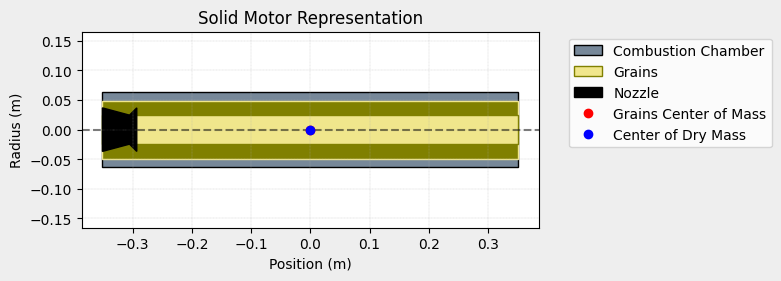

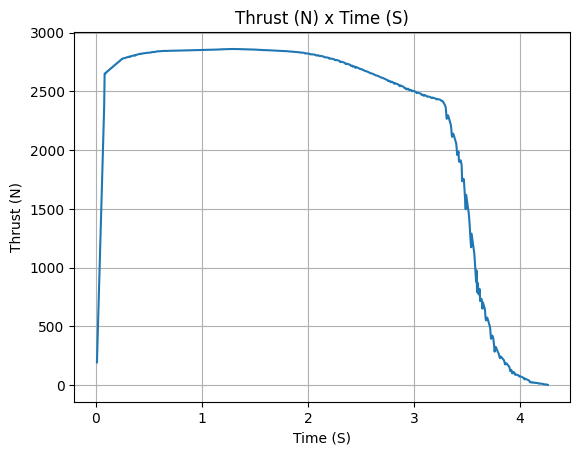

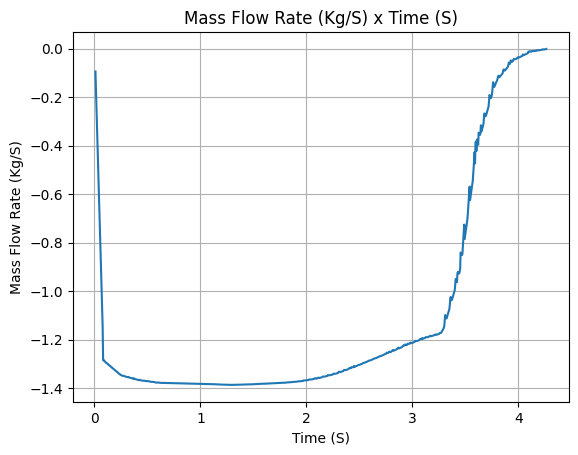

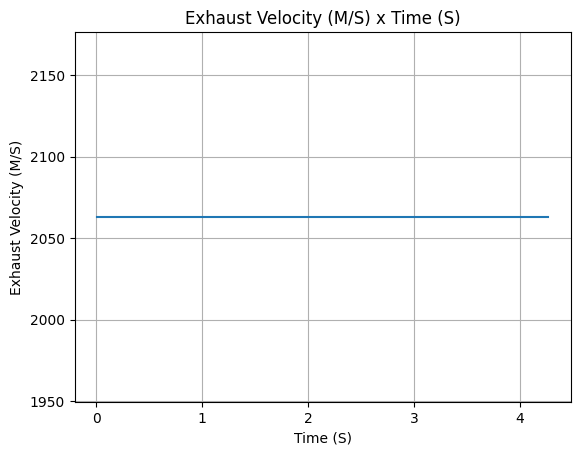

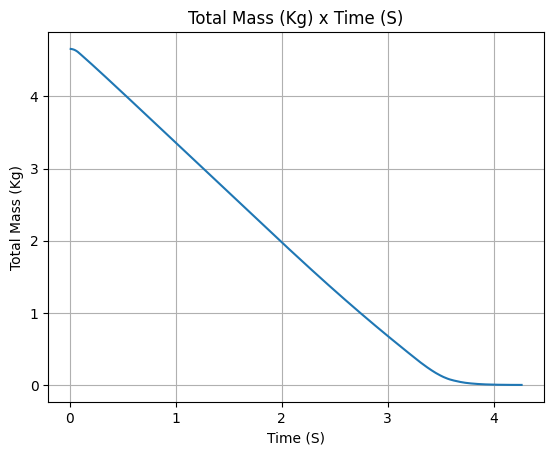

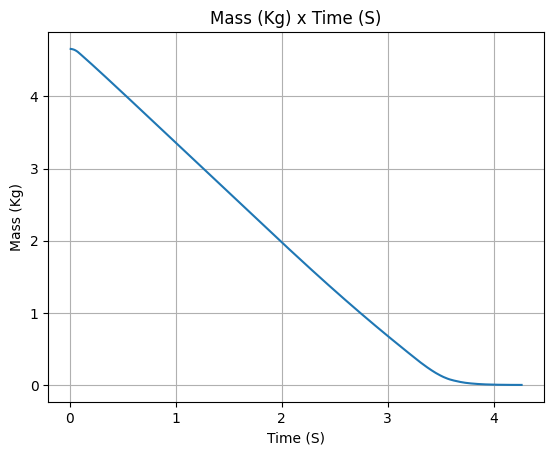

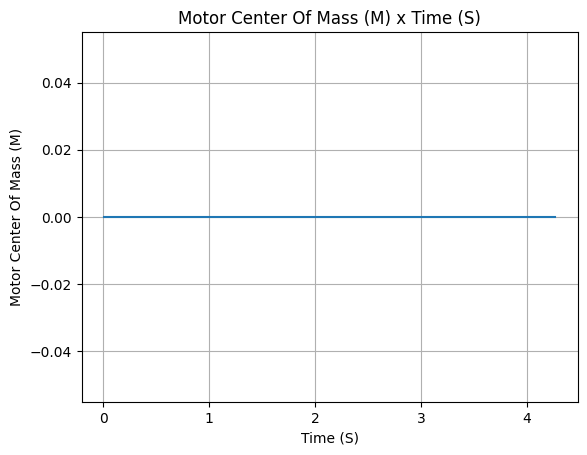

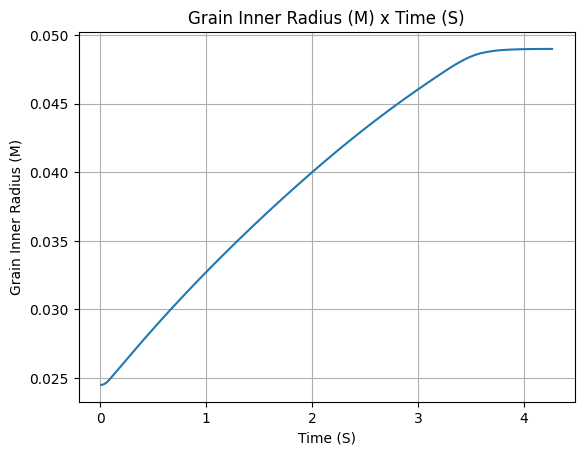

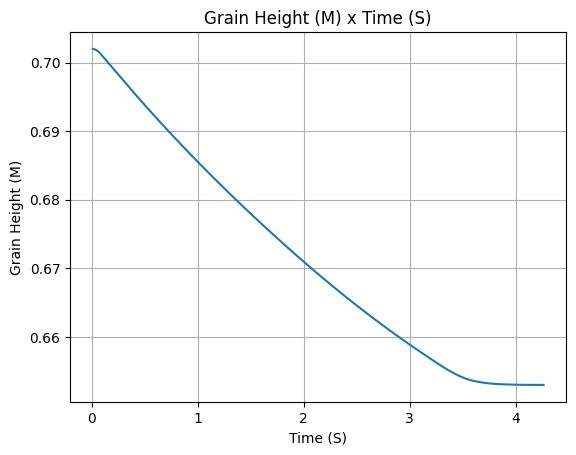

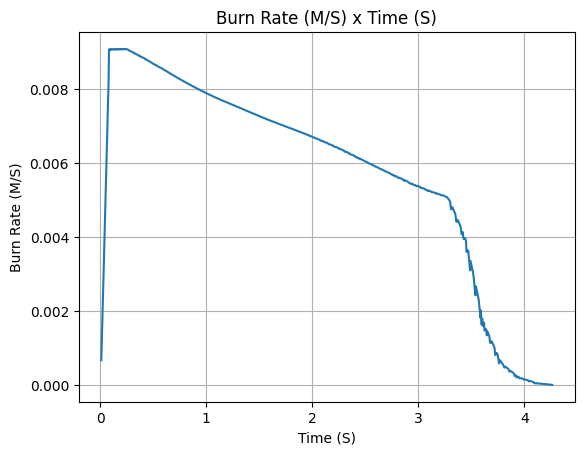

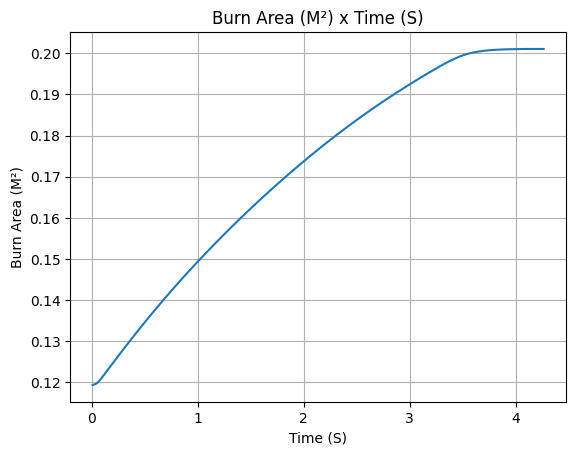

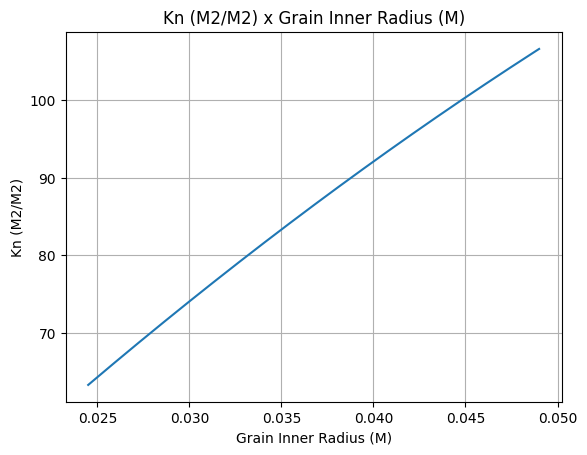

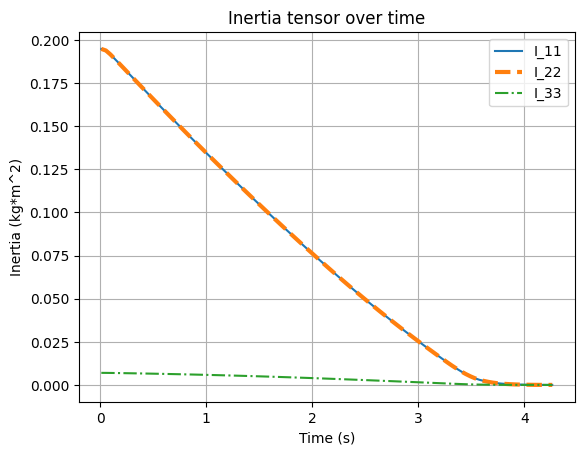

In [13]:
motor.all_info()


## Rocket
Currently, only single stage rockets are supported by Rocket-Serializer
We will start by defining the aerodynamic surfaces, and then build the rocket.


### Nosecones


In [14]:
nosecone = NoseCone(
    length=0.3809999999999999,
    kind='Von Karman',
    base_radius=0.0777875,
    rocket_radius=0.0777875,
    name='0.3809999999999999',
)


### Fins
As rocketpy allows for multiple fins sets, we will create a dictionary with all the fins sets and then add them to the rocket


In [15]:
# No fins were added to the rocket. Check parameters.json.

### Transitions (Tails)
As rocketpy allows for multiple tails, we will create a dictionary with all the tails and then add them to the rocket


In [16]:
tails = {}


In [17]:
tails[0] = Tail(
    top_radius=0.0777875,
    bottom_radius=0.06349999999999999,
    length=0.0508,
    rocket_radius=0.0777875,
    name='Transition',
)


### Parachutes
As rocketpy allows for multiple parachutes, we will create a dictionary with all the parachutes and then add them to the rocket


In [18]:
parachutes = {}


In [19]:
parachutes[0] = Parachute(
    name='Main Parachute + Bag',
    cd_s=13.003,
    trigger=396.240,
    sampling_rate=100, 
)


In [20]:
parachutes[1] = Parachute(
    name='Drogue',
    cd_s=0.642,
    trigger='apogee',
    sampling_rate=100, 
)


In [21]:
rocket = Rocket(
    radius=0.0777875,
    mass=28.271,
    inertia=[0.115, 0.115, 21.424],
    power_off_drag='drag_curve.csv',
    power_on_drag='drag_curve.csv',
    center_of_mass_without_motor=1.476,
    coordinate_system_orientation='nose_to_tail',
)


### Adding surfaces to the rocket
Now that we have all the surfaces, we can add them to the rocket


In [22]:
rocket.add_surfaces(surfaces=[nosecone, tails[0]], positions=[0.0, 2.8964])

In [23]:
rocket.add_motor(motor, position= 2.4727773722627746)


Adding parachutes to the rocket


In [24]:
rocket.parachutes = list(parachutes.values())


### Rail Buttons


In [25]:
rail_buttons = rocket.set_rail_buttons(
   upper_button_position=2.762,
   lower_button_position=3.776,
   angular_position=60.000,
)



Inertia Details

Rocket Mass: 28.271 kg (without motor)
Rocket Dry Mass: 28.271 kg (with unloaded motor)
Rocket Loaded Mass: 32.930 kg
Rocket Structural Mass Ratio: 0.859
Rocket Inertia (with unloaded motor) 11: 0.115 kg*m2
Rocket Inertia (with unloaded motor) 22: 0.115 kg*m2
Rocket Inertia (with unloaded motor) 33: 21.424 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0777875 m
Rocket Frontal Area: 0.019009 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.348 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.997 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.141 m


Aerodynamics Lift Coefficient Derivatives

0.3809999999999999 Lift Coefficient Derivative: 2.000/rad
Transition Lift Coefficient Derivative: -0.667/rad

Cen

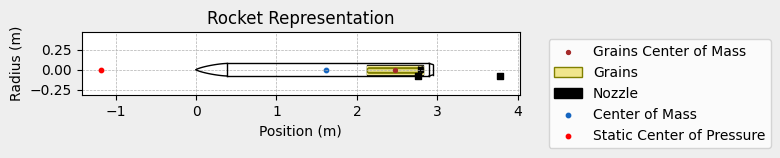


Mass Plots
----------------------------------------


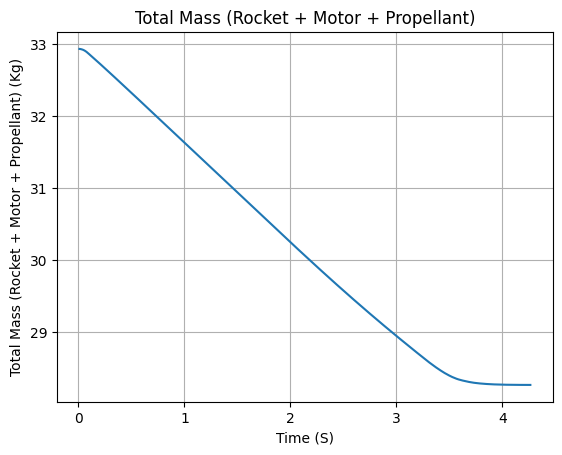

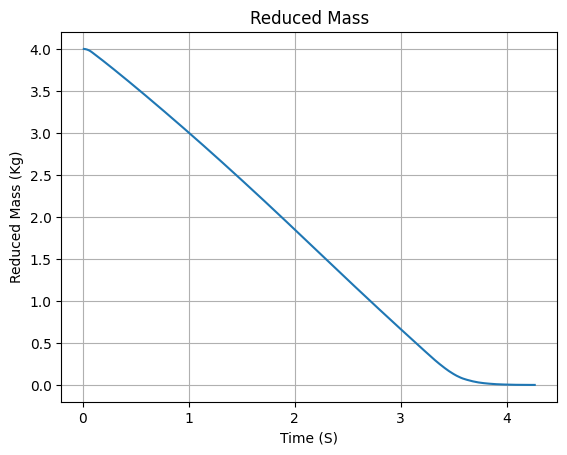


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


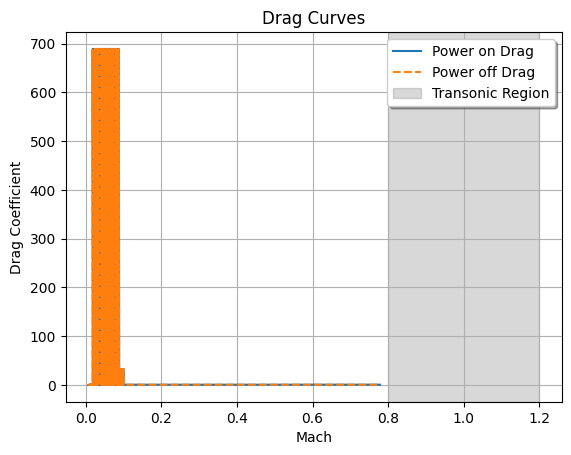


Stability Plots
--------------------


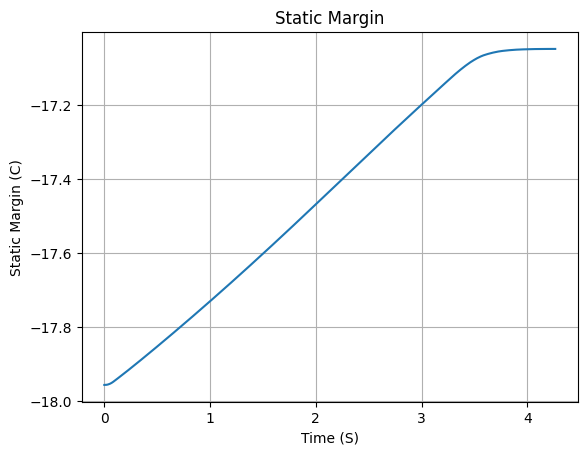

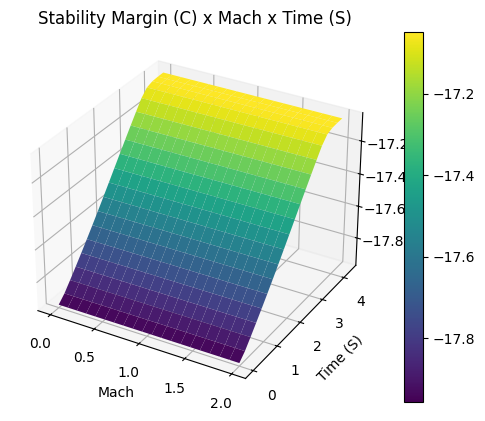


Thrust-to-Weight Plot
----------------------------------------


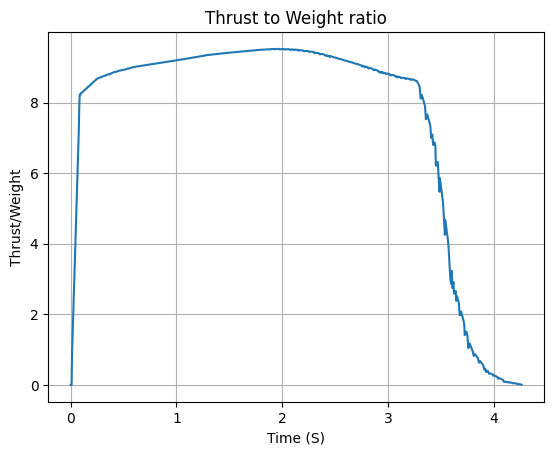

In [26]:
### Rocket Info
rocket.all_info()


## Flight
We will now create the flight simulation. Let's go!


In [27]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=5.1816,
    inclination=90.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)

KeyboardInterrupt: 

In [ ]:
flight.all_info()


## Compare Results
We will now compare the results of the simulation with the parameters used to create it. Let's go!


In [ ]:
### OpenRocket vs RocketPy Parameters
time_to_apogee_ork = 27.255
time_to_apogee_rpy = flight.apogee_time
print(f"Time to apogee (OpenRocket): {time_to_apogee_ork:.3f} s")
print(f"Time to apogee (RocketPy):   {time_to_apogee_rpy:.3f} s")
apogee_difference = time_to_apogee_rpy - time_to_apogee_ork
error = abs((apogee_difference)/time_to_apogee_rpy)*100
print(f"Time to apogee difference:   {error:.3f} %")
print()

flight_time_ork = 226.284
flight_time_rpy = flight.t_final
print(f"Flight time (OpenRocket): {flight_time_ork:.3f} s")
print(f"Flight time (RocketPy):   {flight_time_rpy:.3f} s")
flight_time_difference = flight_time_rpy - flight_time_ork
error_flight_time = abs((flight_time_difference)/flight_time_rpy)*100
print(f"Flight time difference:   {error_flight_time:.3f} %")
print()

ground_hit_velocity_ork = -5.327
ground_hit_velocity_rpy = flight.impact_velocity
print(f"Ground hit velocity (OpenRocket): {ground_hit_velocity_ork:.3f} m/s")
print(f"Ground hit velocity (RocketPy):   {ground_hit_velocity_rpy:.3f} m/s")
ground_hit_velocity_difference = ground_hit_velocity_rpy - ground_hit_velocity_ork
error_ground_hit_velocity = abs((ground_hit_velocity_difference)/ground_hit_velocity_rpy)*100
print(f"Ground hit velocity difference:   {error_ground_hit_velocity:.3f} %")
print()

launch_rod_velocity_ork = 32.615
launch_rod_velocity_rpy = flight.out_of_rail_velocity
print(f"Launch rod velocity (OpenRocket): {launch_rod_velocity_ork:.3f} m/s")
print(f"Launch rod velocity (RocketPy):   {launch_rod_velocity_rpy:.3f} m/s")
launch_rod_velocity_difference = launch_rod_velocity_rpy - launch_rod_velocity_ork
error_launch_rod_velocity = abs((launch_rod_velocity_difference)/launch_rod_velocity_rpy)*100
print(f"Launch rod velocity difference:   {error_launch_rod_velocity:.3f} %")
print()

max_acceleration_ork = 106.566
max_acceleration_rpy = flight.max_acceleration
print(f"Max acceleration (OpenRocket): {max_acceleration_ork:.3f} m/s²")
print(f"Max acceleration (RocketPy):   {max_acceleration_rpy:.3f} m/s²")
max_acceleration_difference = max_acceleration_rpy - max_acceleration_ork
error_max_acceleration = abs((max_acceleration_difference)/max_acceleration_rpy)*100
print(f"Max acceleration difference:   {error_max_acceleration:.3f} %")
print()

max_altitude_ork = 3859.603
max_altitude_rpy = flight.apogee - flight.env.elevation
print(f"Max altitude (OpenRocket): {max_altitude_ork:.3f} m")
print(f"Max altitude (RocketPy):   {max_altitude_rpy:.3f} m")
max_altitude_difference = max_altitude_rpy - max_altitude_ork
error_max_altitude = abs((max_altitude_difference)/max_altitude_rpy)*100
print(f"Max altitude difference:   {error_max_altitude:.3f} %")
print()

max_mach_ork = 1.014
max_mach_rpy = flight.max_mach_number 
print(f"Max Mach (OpenRocket): {max_mach_ork:.3f}")
print(f"Max Mach (RocketPy):   {max_mach_rpy:.3f}")
max_mach_difference = max_mach_rpy - max_mach_ork
error_max_mach = abs((max_mach_difference)/max_mach_rpy)*100
print(f"Max Mach difference:   {error_max_mach:.3f} %")
print()

max_velocity_ork = 336.887
max_velocity_rpy = flight.max_speed
print(f"Max velocity (OpenRocket): {max_velocity_ork:.3f} m/s")
print(f"Max velocity (RocketPy):   {max_velocity_rpy:.3f} m/s")
max_velocity_difference = max_velocity_rpy - max_velocity_ork
error_max_velocity = abs((max_velocity_difference)/max_velocity_rpy)*100
print(f"Max velocity difference:   {error_max_velocity:.3f} %")
print()

max_thrust_ork = 2861.69
max_thrust_rpy = flight.rocket.motor.thrust.max
print(f"Max thrust (OpenRocket): {max_thrust_ork:.3f} N")
print(f"Max thrust (RocketPy):   {max_thrust_rpy:.3f} N")
max_thrust_difference = max_thrust_rpy - max_thrust_ork
error_max_thrust = abs((max_thrust_difference)/max_thrust_rpy)*100
print(f"Max thrust difference:   {error_max_thrust:.3f} %")
print()

burnout_stability_margin_ork = 2.258
burnout_stability_margin_rpy = flight.stability_margin(flight.rocket.motor.burn_out_time)
print(f"Burnout stability margin (OpenRocket): {burnout_stability_margin_ork:.3f}")
print(f"Burnout stability margin (RocketPy):   {burnout_stability_margin_rpy:.3f}")
burnout_stability_margin_difference = burnout_stability_margin_rpy - burnout_stability_margin_ork
error_burnout_stability_margin = abs((burnout_stability_margin_difference)/burnout_stability_margin_rpy)*100
print(f"Burnout stability margin difference:   {error_burnout_stability_margin:.3f} %")
print()

max_stability_margin_ork = 3.232
max_stability_margin_rpy = flight.max_stability_margin
print(f"Max stability margin (OpenRocket): {max_stability_margin_ork:.3f}")
print(f"Max stability margin (RocketPy):   {max_stability_margin_rpy:.3f}")
max_stability_margin_difference = max_stability_margin_rpy - max_stability_margin_ork
error_max_stability_margin = abs((max_stability_margin_difference)/max_stability_margin_rpy)*100
print(f"Max stability margin difference:   {error_max_stability_margin:.3f} %")
print()

min_stability_margin_ork = 0.0
min_stability_margin_rpy = flight.min_stability_margin
print(f"Min stability margin (OpenRocket): {min_stability_margin_ork:.3f}")
print(f"Min stability margin (RocketPy):   {min_stability_margin_rpy:.3f}")
min_stability_margin_difference = min_stability_margin_rpy - min_stability_margin_ork
error_min_stability_margin = abs((min_stability_margin_difference)/min_stability_margin_rpy)*100
print(f"Min stability margin difference:   {error_min_stability_margin:.3f} %")
print()

